# Reator

![reator](./reator.png)


**Equacionamento**:

$V\cdot\frac{d c_\text{A}(t)}{dt} =  Fin\cdot\left(c_{\text{A}_{\text{carga}}} - c_\text{A}(t)\right) + V\cdot r_\text{A}$

$V\cdot\frac{d c_\text{B}(t)}{d t} = Fin\cdot\left(-c_{B}\right) + V\cdot r_\text{B}$

$V\cdot\frac{d c_\text{C}(t)}{d t} = Fin\cdot\left(-c_{c}\right)+ V\cdot k_2\cdot c_\text{B}(t)^{\beta}$


$r_\text{A} = -k_1\cdot c_\text{A}(t) - k_3\cdot c_\text{A}(t)^\alpha$

$r_\text{B} = k_1\cdot c_\text{A}(t) - k_2\cdot c_\text{B}(t)^\beta$

$F_\text{in} = F_\text{out}$

Reações: 

$A \rightarrow B \rightarrow C$

$ A \rightarrow D $

**Variáveis**:

- $V$ -> volume do reator em (l)

- $c_{\text{A}_{\text{carga}}}$ -> concentração do reagente A na corente de alimentação do reator (gmol/l)

- $F_\text{in}$ -> vazão de alimentação (l/s)

- $C_\text{A}$ -> concentração de A no reator (gmol/l)

- $C_\text{B}$ -> concentração de B no reator (gmol/l)

- $C_\text{C}$ -> concentração de C no reator (gmol/l)

- $k_1$ -> parâmetro associado à taxa de conversão de A em B (h$^{-1}$)

- $k_2$ -> parâmetro associado à taxa de conversão de B em C (1/(h$\cdot$(gmol/l)$^{\beta-1})$)

- $k_3$ -> parâmetro associado à taxa de conversão de A em D (1/(h$\cdot$(gmol/l)$^{\alpha-1})$)


In [3]:
# Importação de pacotes
import serial

from numpy import linspace, array, hstack

## Pacotes que permitem manipular como os gráficos aparecem neste notebook
from matplotlib.pyplot import figure, tight_layout
from IPython import display
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

In [9]:
# Gráfico

def grafico(Ca,Cb,Cc,Fin,Cacarga,instanteTempo):
    
    fig = figure(figsize=(8,4))
        
    ax = fig.add_subplot(1, 3, 1)
    ax.plot([0, 0], [0, 5], 'k-',[1, 1], [0, 5], 'k-')
    ax.plot([0, 1], [float(Ca), float(Ca)], 'b-')
    ax.set_ylabel('Ca')
    ax.set_ylim(0,20)
    ax.get_xaxis().set_visible(False)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.plot([0, 0], [0, 5], 'k-',[1, 1], [0, 5], 'k-')
    ax.plot([0, 1], [float(Cb), float(Cb)], 'b-')
    ax.set_ylabel('Cb')
    ax.set_ylim(0,20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True)
    
    ax = fig.add_subplot(1, 3, 3)
    ax.plot([0, 0], [0, 5], 'k-',[1, 1], [0, 5], 'k-')
    ax.plot([0, 1], [float(Cc), float(Cc)], 'b-')
    ax.set_ylabel('Cc')
    ax.set_ylim(0,20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True)
    
    ax.text(1.2, 5, 'Tempo: {:.2f} s'.format(instanteTempo), fontsize=14, verticalalignment='top',)
    ax.text(1.2, 4, 'Fin: {:.2f} l/s'.format(float(Fin)), fontsize=14, verticalalignment='top',)
    ax.text(1.2, 1, 'Cacarga: {:.2f} gmol/l $'.format(float(Cacarga)), fontsize=14, verticalalignment='top',)
    
    tight_layout()
    
def grafico_tendencia(Ca,Cb,Cc,Fin,Cacarga,namostra):
    
    tempo = linspace(0,(namostra-1)*Ts,namostra)

    fig = figure(figsize=(10,5))

    axes = fig.add_subplot(3,1,1)
    axes.plot(tempo,Ca,'.-')
    axes.set_ylabel('$Ca$ / gmol/l')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(3,1,2)
    axes.plot(tempo,Cb,'.-')
    axes.set_ylabel('$Cb$/ gmol/l')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(3,1,3)
    axes.plot(tempo,Cc,'.-')
    axes.set_ylabel('$Cc$/ gmol/l')
    axes.set_xlabel('tempo /s')

    fig = figure(figsize=(10,5))

    axes = fig.add_subplot(2,1,1)
    axes.plot(tempo,Fin,'.-')
    axes.set_ylabel('$Fin$ / l/s')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(2,1,2)
    axes.plot(tempo,Cacarga,'.-')
    axes.set_ylabel('$Cacarga$ / gmol/l')
    axes.set_xlabel('tempo /s')


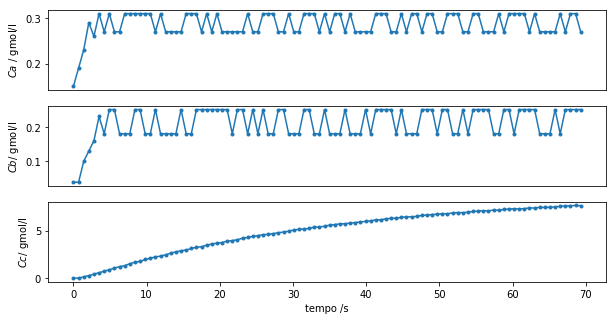

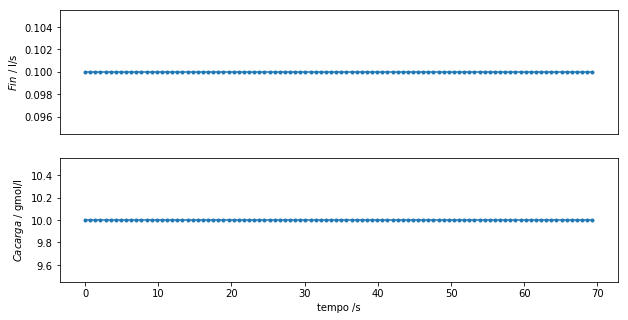

In [12]:
ser = serial.Serial('/dev/ttyACM0', 9600)  # Establish the connection on a specific port

nsim = 100 # Quantidade total de amostras

Ts = 0.7 # Período de amostragem [s]

# Condições iniciais

Ca0 = 0.
Cb0 = 0.
Cc0  = 0.

# Variáveis exógenas
Fin = [0.1]*25 # l/s
[Fin.append(0.0066) for it in range(50)]
[Fin.append(0.1) for it in range(25)]

Cacarga = [10]*200 # Concentração carga gmol/l
[Cacarga.append(1.) for it in range(30)]
[Cacarga.append(2.9) for it in range(50)]


# Iniciando listas
Ca = []
Cb = []
Cc = []
Fin_ = []
Cacarga_ = []

# Comunicação
x = ser.readline()
print(x)

#Escrevendo condicoes inicias
ser.write(bytearray('{:.2f};{:.2f};{:.2f}'.format(Ca0,Cb0,Cc0),'ASCII'))

# Simulando...
for it in range(nsim):
    
    ser.write(bytearray('{:.1f};{:.2f};{:.2f};{:.2f}\n'.format(1,Fin[it],Cacarga[it],Ts),'ASCII'))
    x = ser.readline().decode("utf-8")
    
    data = x.split('&')

    Ca.append(float(data[0]))
    Cb.append(float(data[1])) 
    Cc.append(float(data[2])) 
    Fin_.append(float(data[3]))
    Cacarga_.append(float(data[4]))
    
    # mostrando a figura
    #grafico(*data,it*Ts)
    #OU
    grafico_tendencia(Ca,Cb,Cc,Fin_,Cacarga_,it+1)
    display.clear_output(wait=True)
    show_inline_matplotlib_plots()
        
    
ser.close() # Fechando a conexão com o arduino através da porta serial

In [10]:
ser.close()